In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import pybedtools as bt

from collections import Counter, deque
import pickle
import re
import os

from mycolorpy import colorlist as mcp
import matplotlib.patches as mpatches
import matplotlib.collections as mcol
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import gridspec
from scipy.stats import shapiro, mannwhitneyu, iqr

from scipy.spatial import distance
from scipy.cluster import hierarchy


from sklearn.preprocessing import minmax_scale

from adjustText import adjust_text

color1=mcp.gen_color(cmap="Reds",n=10)[-7:-2]
color2=mcp.gen_color(cmap="Greys",n=10)[-7:-2]
color3=mcp.gen_color(cmap="Blues",n=10)[-7:-2]
color4=mcp.gen_color(cmap="Greens",n=10)[-7:-2]



def flatten(l):
    return [item for sublist in l for item in sublist]

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

        
def change_height(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_height()
        diff = current_width - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)



colorPalette = {
    "ANDR"    : color1[-1],
    "High"    : color2[-1],
    "Mid-high": color2[-1],
    "Mid-low" : color2[-1],
    "low"     : color2[-1],
    
    "ARcre"   : "#F19323",
    "cre"     : "#888888",
}

MAPty = pickle.load(open('zenodo/MAPty.p', 'rb'))
MAPcl = pickle.load(open('zenodo/MAPcl.p', 'rb'))
MAPgn = pickle.load(open('zenodo/MAPgn.p', 'rb'))


BEDPRO = pickle.load(open('zenodo/BEDPRO.p', 'rb'))
GENES = dict(zip(BEDPRO['Gene'], BEDPRO['Name']))

# N contains BW signal for RNA seq but BEDPRO contains  
N = pd.read_table('zenodo/Epigenome.tmm.tsv').set_index('Name').drop_duplicates()
N.loc[N.index.isin(BEDPRO['Name']), 'RNAseq_Vh'] = N[N.index.isin(BEDPRO['Name'])].index.map(dict(zip(BEDPRO['Name'], BEDPRO['Vh'])))
N.loc[N.index.isin(BEDPRO['Name']), 'RNAseq_30m'] = N[N.index.isin(BEDPRO['Name'])].index.map(dict(zip(BEDPRO['Name'], BEDPRO['30m'])))
N.loc[N.index.isin(BEDPRO['Name']), 'RNAseq_4h'] = N[N.index.isin(BEDPRO['Name'])].index.map(dict(zip(BEDPRO['Name'], BEDPRO['4h'])))
N.loc[N.index.isin(BEDPRO['Name']), 'RNAseq_16h'] = N[N.index.isin(BEDPRO['Name'])].index.map(dict(zip(BEDPRO['Name'], BEDPRO['16h'])))
N.loc[N.index.isin(BEDPRO['Name']), 'RNAseq_72h'] = N[N.index.isin(BEDPRO['Name'])].index.map(dict(zip(BEDPRO['Name'], BEDPRO['72h'])))

H = pickle.load(open('zenodo/G_ALL.p', 'rb'))



KLK3
KLK2


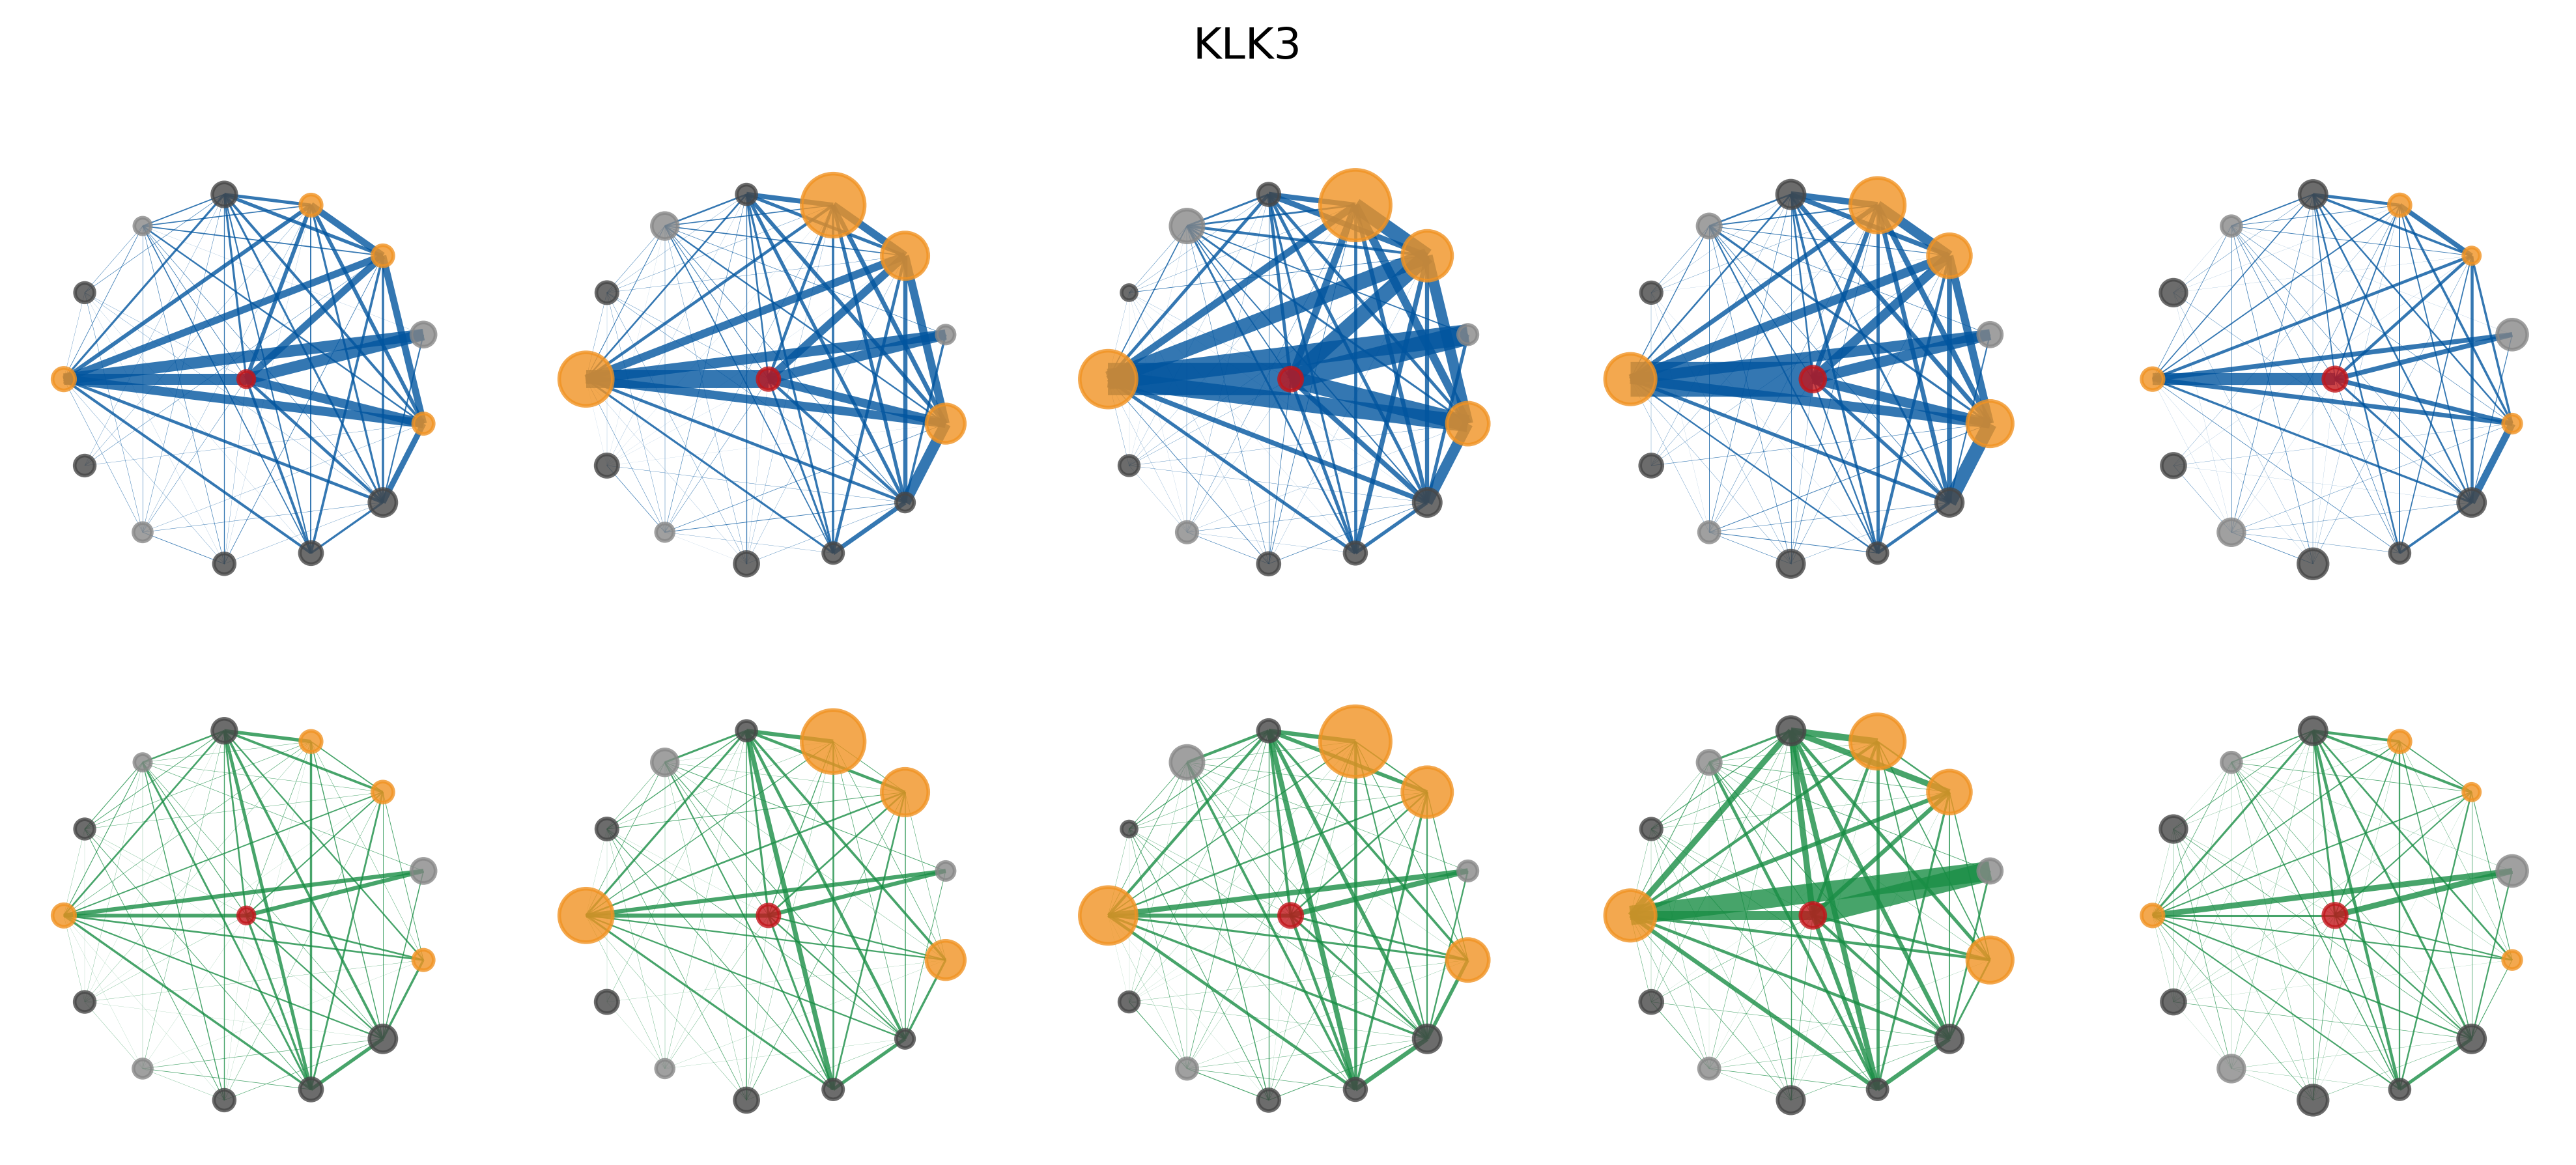

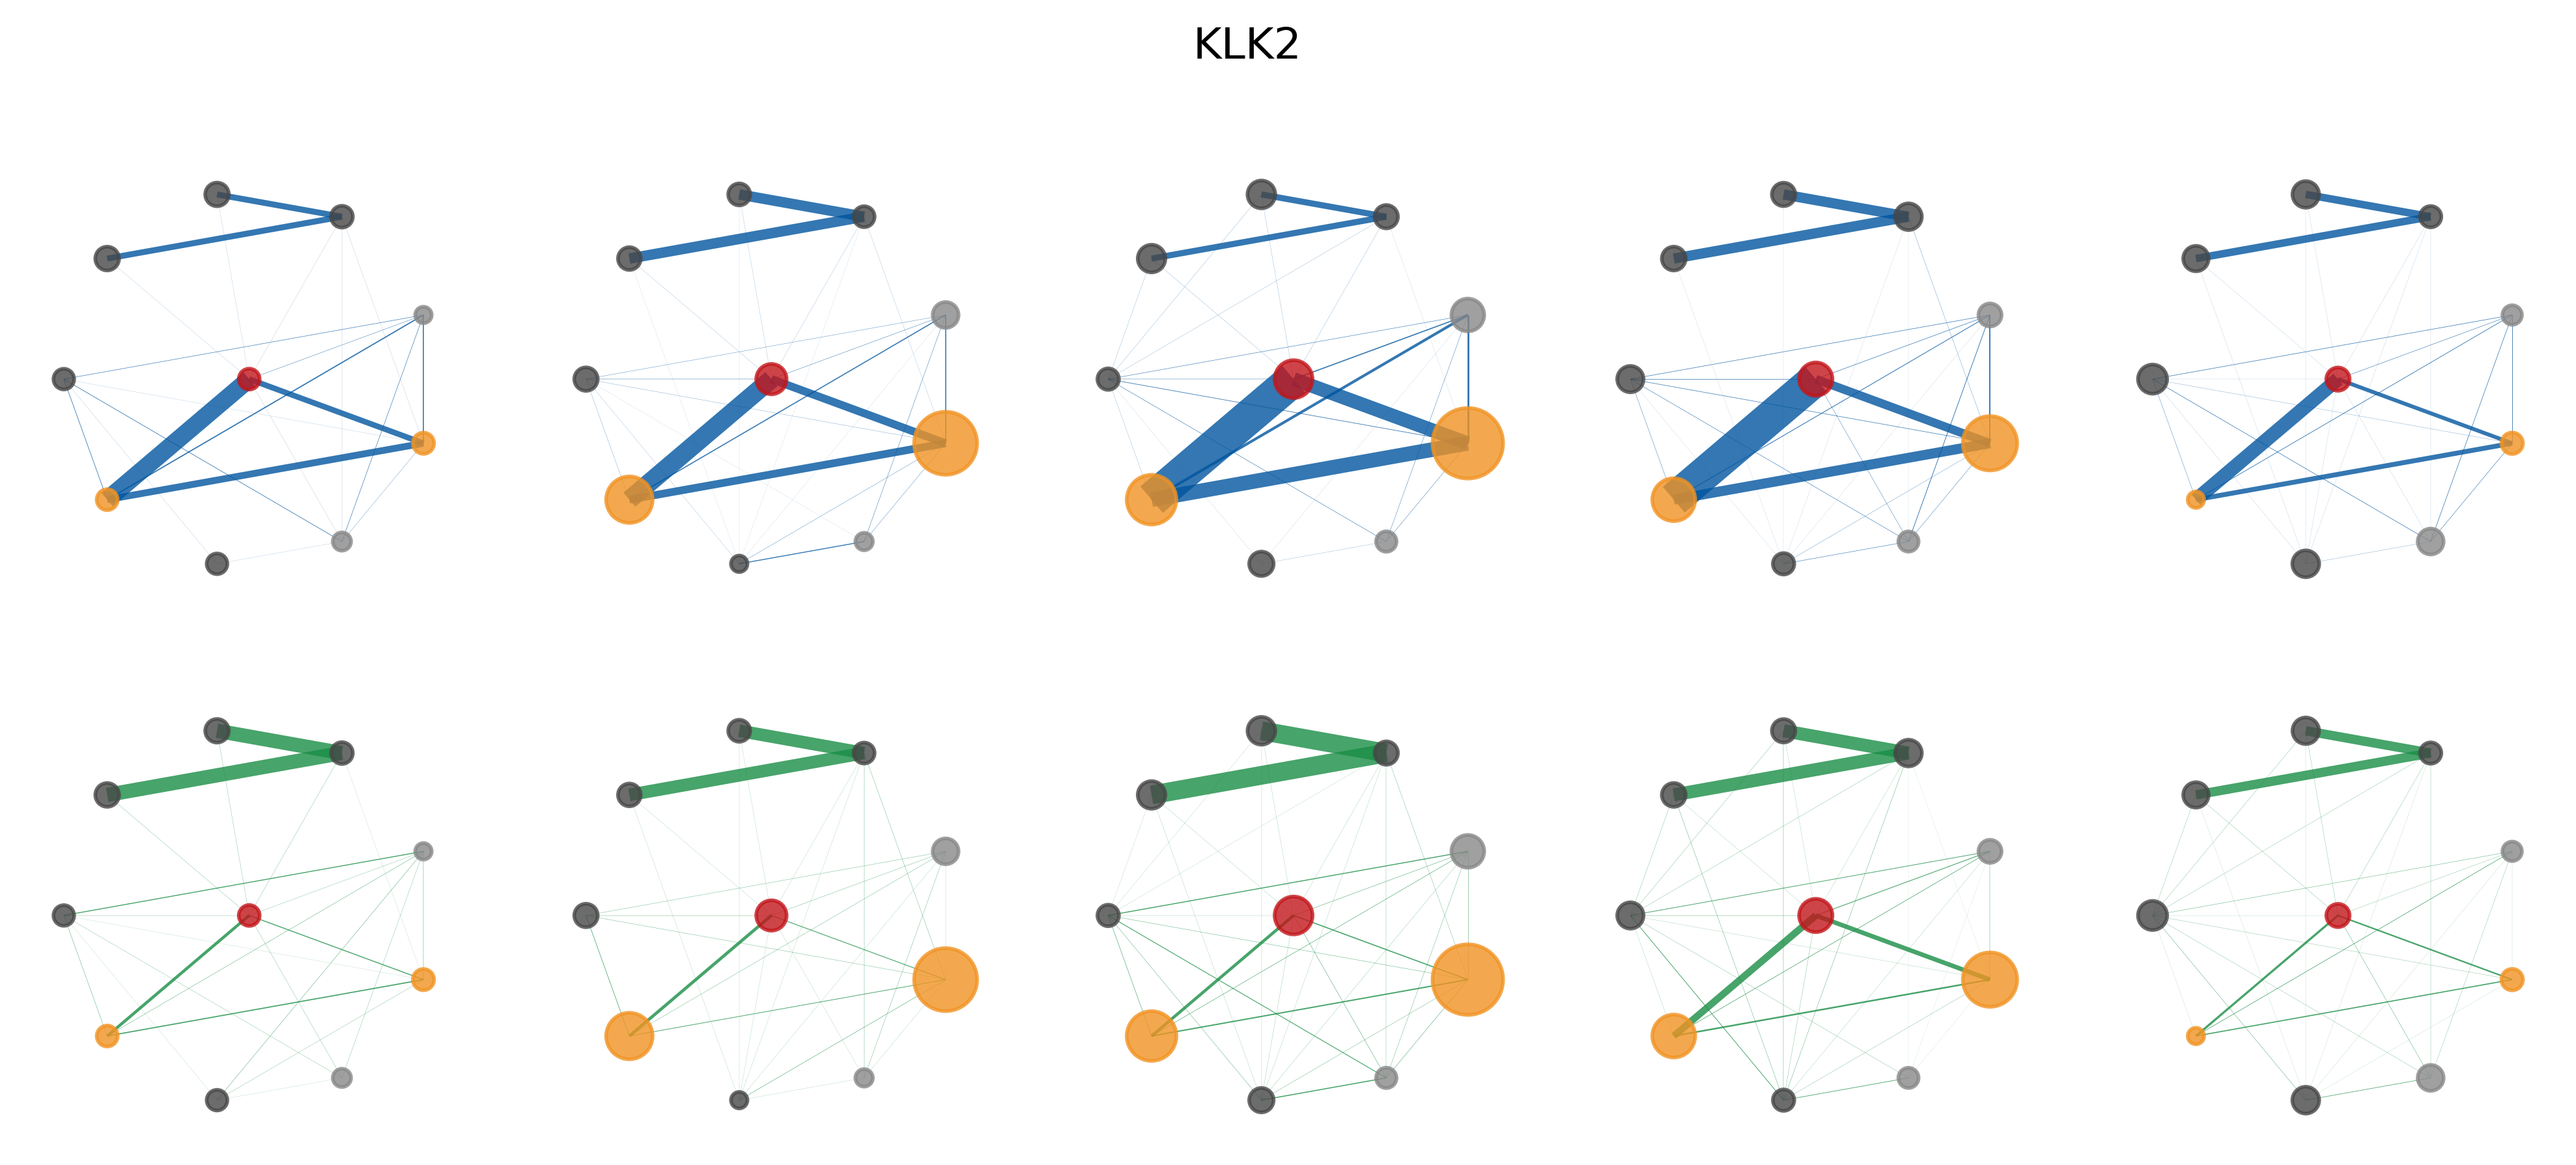

In [2]:
wills =  ['KLK3', 'KLK2']
#wills = ['KLF9', 'KLF15', 'SP2', 'SP3']

#wills = ['KLF3','KLF11', 'KLF16', 'KLF1', 'KLF2',  'KLF4', 'KLF5', 'KLF6', 'KLF7', 'KLF8', 'KLF9', 'KLF10', 'KLF13', 'KLF14', 'KLF15','SP1', 'SP2','SP3','SP4','SP5', 'SP6', 'SP7','SP8','SP9','AR']

#wills = ['KMT2A','KMT2B', 'KMT2C', 'KMT2D', 'KMT2E']

#[colorPalett[v] for k,v in g.nodes(data='nodeClass')]

for will_ in wills:
    will = GENES[will_]
    print(will_)


    l = list(nx.bfs_layers(H, will))
    g = H.subgraph(flatten(l[:2]))
    pos = nx.shell_layout(g,l[:2])


    fig = plt.figure(figsize=[12.5,5], dpi=400)
    gs = gridspec.GridSpec(nrows=2, ncols=5)
    for i, s in enumerate([ 'H3K27ac', 'H3K4me3']):
        for j, t in enumerate(['Vh', '30m', '4h', '16h', '72h']):
            fig.add_subplot(gs[i, j])

            MAPvl = dict(zip(N.index, N[f'AR_{t}']))
            w = {(a,b): w/10 for a,b,w in g.edges(data=f'{s}.{t}')}
            

            if s == 'H3K27ac':
                edge_color='#01559F'
            else:
                edge_color='#198E45'
            #w = dict(zip(w.keys(), minmax_scale(np.array(list(w.values())))*5))
            nx.draw(g, pos,edgelist=w.keys() , width=list(w.values()),
                node_color=[colorPalette[v] for k,v in g.nodes(data='nodeClass')],
                edge_color=edge_color,
                node_size = [
                    MAPvl[a] * 2.5
                    #if a != will else rna[t][will]
                    for a in g.nodes
                ],
                alpha=0.8, font_size=12,font_color='k',

            )

        fig.suptitle(will_)

    #fig.savefig(f'../plots/{will_}_GRAPH_MAIN.pdf', bbox_inches ="tight",  pad_inches = 1 )
#dict(zip([n for n in g.nodes if MAPcl[n] == 'ARcre'] + [will], ['ARBS1', 'ARBS2', 'ARBS3', 'ARBS5']+[will_]))